List of analyses to do:
* Boxplots of AHI based on categorical variables
* Simple linear regression onto AHI
* Feature importance with decision trees
* PCA or similar to see correlation between features
* Clustering analysis

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# Imports scikit-learn
import sklearn.linear_model as lm
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
# Load data
data_file = '/Users/htomlinson/Documents/Rhodes/RAIL/UMD Sleep Apnea data.csv'
Data = pd.read_csv(data_file)

# New variable for whether the patient has sleep apnoea
Data['apnoea'] = pd.Series(Data['ahi']<1, index=Data.index)

In [3]:
# Data summary
print(Data.head())

  gender ethnicity  term        bmi        age allergies asthma gerd  \
0   Male     White   0.0  25.929191   3.093771       Yes    Yes   No   
1   Male  Hispanic   0.0  31.462240   4.550308        No     No   No   
2   Male  Hispanic   0.0  36.104691   4.678987       Yes    Yes   No   
3   Male     Black   0.0  69.219425  16.953425        No     No   No   
4   Male     Black   0.0  50.974365  17.120548        No     No   No   

   tonsilsize  nrem   ...      zscore    ahi  oahi  cai     oai     ohi  \
0           3  75.7   ...    4.920000    2.1   2.0  0.1    0.29    1.71   
1           3  80.6   ...    4.927145   15.8  15.3  0.5    1.33   13.97   
2           2  75.1   ...    4.990000   28.6  27.8  0.8    0.09   27.71   
3           3  44.7   ...    3.460000  118.0   2.5  0.5  115.50  115.50   
4           3  66.5   ...    3.160000   60.5  42.7  1.4   16.90   16.90   

   lowsao2  peakc02  tb90  apnoea  
0       90       50   0.0   False  
1       86       50   0.3   False  
2       

In [4]:
# Define variables
admission_variables = ['gender', 'ethnicity', 'term', 'bmi', 'age', 'allergies', 'asthma', 'gerd', 'tonsilsize']
laboratory_variables = ['nrem', 'rem', 'sleepefficiency', 'arousali', \
                        'tst50co2', 'zscore', 'oahi', 'cai', 'oai', \
                        'ohi', 'lowsao2', 'peakc02', 'tb90']
test_variable = ['apnoea']

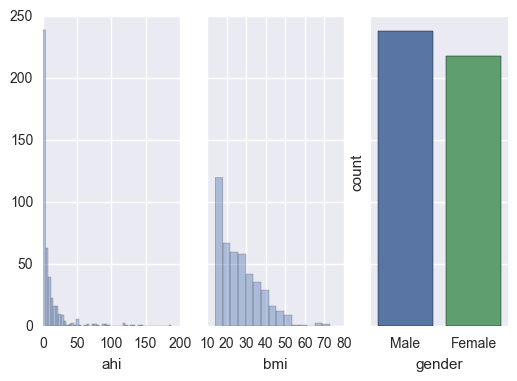

In [5]:
# Distributions
f,(ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
sns.distplot(Data["ahi"], kde=False, ax=ax1)
sns.distplot(Data["bmi"],kde=False, ax=ax2)
sns.countplot(x="gender", data=Data, ax=ax3)

0.303510383324


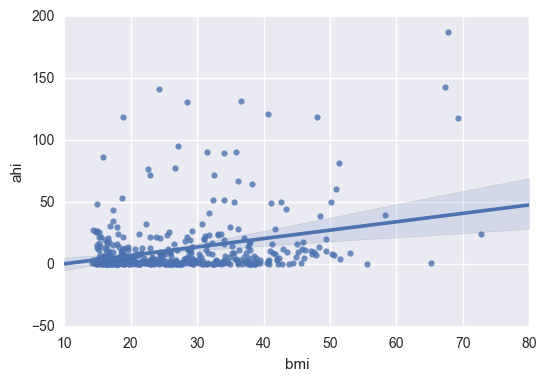

In [6]:
# Obvious correlation to look at

sns.regplot(x="bmi", y="ahi", data=Data)
corr_coeff = stats.pearsonr(Data["bmi"],Data["ahi"])
print(corr_coeff[0])

(0, 50)

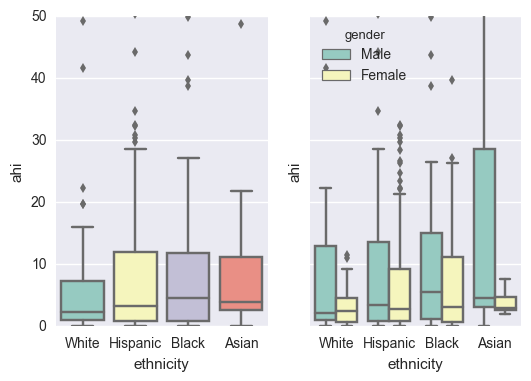

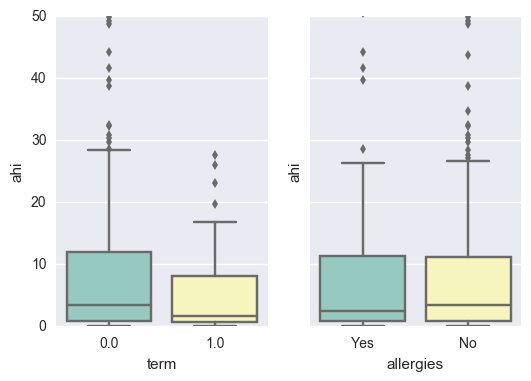

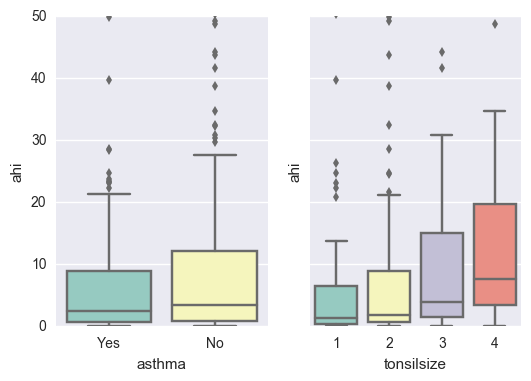

In [8]:
# A few boxplots: AHI based on age, gender, term, BMI, asthma

f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(x="ethnicity", y="ahi",data=Data, palette="Set3",ax=ax1)
sns.boxplot(x="ethnicity", y="ahi",data=Data, hue = "gender", palette="Set3",ax=ax2)
sns.plt.ylim(0,50)

f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(x="term", y="ahi",data=Data, palette="Set3",ax=ax1)
sns.boxplot(x="allergies", y="ahi",data=Data, palette="Set3",ax=ax2)
sns.boxplot(x="asthma", y="ahi",data=Data, palette="Set3",ax=ax3)
sns.plt.ylim(0,50)

f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(x="asthma", y="ahi",data=Data, palette="Set3",ax=ax1)
sns.boxplot(x="tonsilsize", y="ahi",data=Data, palette="Set3",ax=ax2)
sns.plt.ylim(0,50)

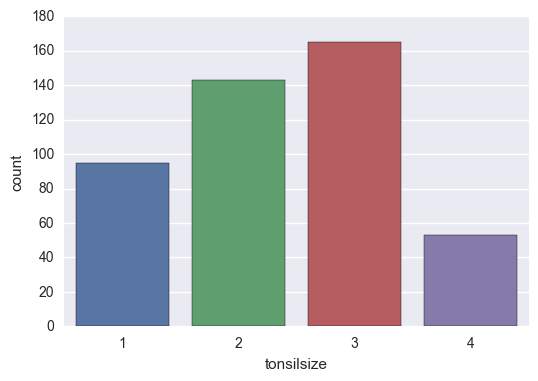

In [9]:
# Tonsilsize looks correlated... check distribution
sns.countplot(x="tonsilsize", data=Data)

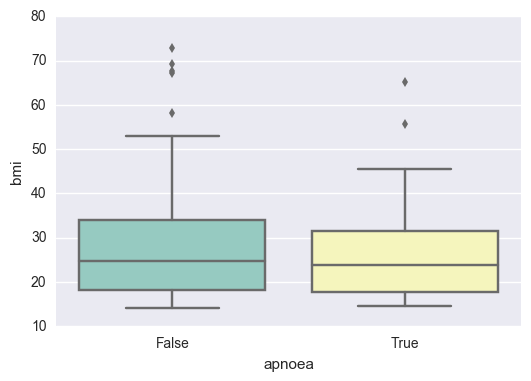

In [79]:
# Boxplot of BMI based on apnoea status
sns.boxplot(x="apnoea", y="bmi",data=Data, palette="Set3")


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Feature ranking:
1. gender (0.312822)
2. ethnicity (0.280505)
3. term (0.125720)
4. bmi (0.102104)
5. age (0.044164)
6. allergies (0.043887)
7. asthma (0.042642)
8. gerd (0.025551)
9. tonsilsize (0.022606)


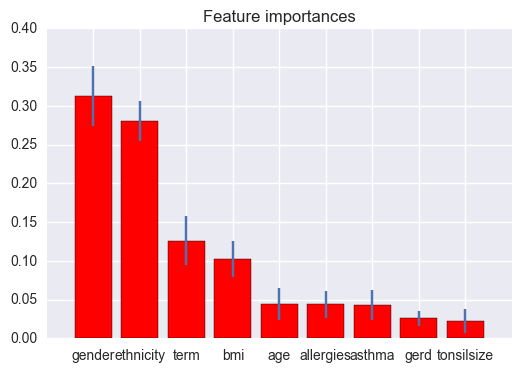

In [151]:
# Set up data for feature analysis

# Set up Data
X = Data[admission_variables]
X.is_copy = False
y = Data[test_variable]

# Encode categorical data
cat_labels = ["gender","ethnicity", "allergies","asthma","gerd"]
le = preprocessing.LabelEncoder()

for cat_label in cat_labels:
    le.fit(X[cat_label])
    X[cat_label] = le.transform(X[cat_label])

# Remove missing term values
X["term"].fillna(0, inplace=True)

# Feature importance analysis

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier()

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, list(X)[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), list(X))
plt.xlim([-1, X.shape[1]])
plt.show()

In [152]:
# Repeat feature analysis including laboratory variables

# Set up Data
X = Data[admission_variables+laboratory_variables]
X.is_copy = False
y = Data[test_variable]

# Encode categorical data
cat_labels = ["gender","ethnicity", "allergies","asthma","gerd"]
le = preprocessing.LabelEncoder()

for cat_label in cat_labels:
    le.fit(X[cat_label])
    X[cat_label] = le.transform(X[cat_label])

# Remove missing term values
X["term"].fillna(0, inplace=True)

# Feature importance analysis

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier()

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, list(X)[f], importances[indices[f]]))

Feature ranking:
1. gender (0.159043)
2. ethnicity (0.087671)
3. term (0.074958)
4. bmi (0.069429)
5. age (0.064256)
6. allergies (0.063693)
7. asthma (0.052927)
8. gerd (0.047936)
9. tonsilsize (0.042395)
10. nrem (0.038463)
11. rem (0.037359)
12. sleepefficiency (0.034216)
13. arousali (0.033038)
14. tst50co2 (0.031100)
15. zscore (0.025565)
16. oahi (0.025215)
17. cai (0.024752)
18. oai (0.023281)
19. ohi (0.022284)
20. lowsao2 (0.017219)
21. peakc02 (0.013606)
22. tb90 (0.011597)


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
